# Web Scraping with credentials

# The objective is to download all files from https://simpleenergy.com.br/teste/, this link requires a password (98465, 321465) and we have different files according to the password used. We must download all files for all passwords

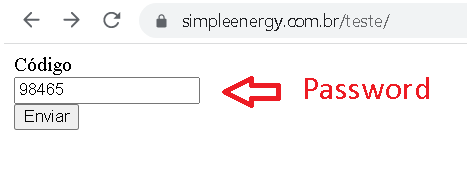

![image.png](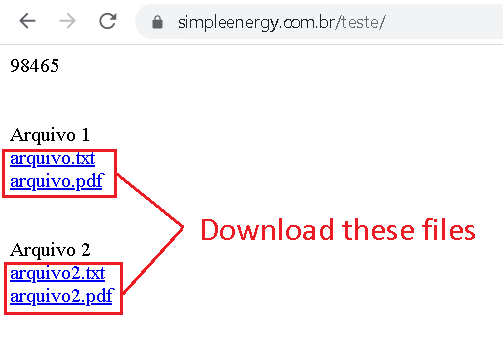![image.png]())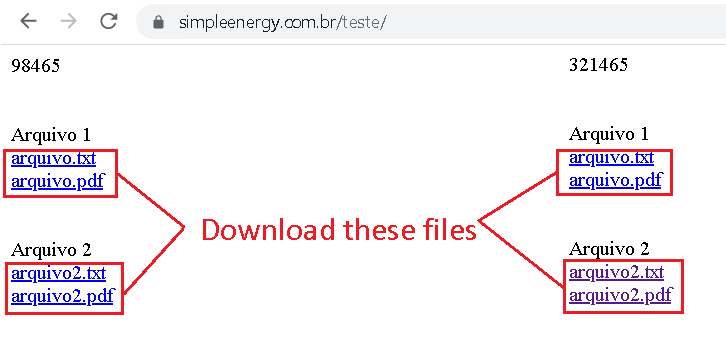

# Import libraries

In [32]:
import requests
from bs4 import BeautifulSoup

# Create extraction process

In [33]:
# Begin iterative process

for password in [98465, 321465]:
  
  # Payload

  headers = {
        'authority': 'simpleenergy.com.br',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cache-control': 'max-age=0',
        'origin': 'https://simpleenergy.com.br',
        'referer': 'https://simpleenergy.com.br/teste/',
        'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Google Chrome";v="108"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    }

  data = {
      'csrf': '74c9fb0432e9f45df8168cd75d7083322d1c3c07c43aafe7e8b9727340eea17d',
      'codigo': str(password),
  }

  # Create connection to link

  with requests.Session() as s:
      url = 'https://simpleenergy.com.br/teste/'
      response = s.post(url, headers=headers, data=data)

      # Create soup object

      c = response.content
      soup = BeautifulSoup(c)

      # Extract file names

      path = set(i.find("a") for i in soup.find_all("div") if i.find("a") != None)  
      files = [i.get('href') for i in path]

      # Extract files

      for file in files:

        with open(file, 'wb') as r:
          data = s.get(url + file, headers=headers, data=data)
          if data.status_code == 200:
            r.write(data.content)


# Results

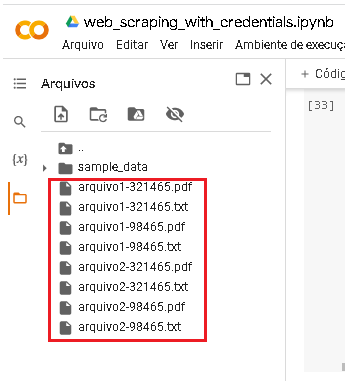